<a href="https://colab.research.google.com/github/sourcecode369/TensorFlow-2.0/blob/master/tensorflow_2.0_docs/TensorFlow%20Core/Tutorials/Images/Optimizing%20Models/Conv_Net_Optimizing_with_Tensorboard_(Grid_Search_for_Neural_Networks).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
%reload_ext tensorboard
import time

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D

In [3]:
#import util_mnist_reader
# X_train, y_train = util_mnist_reader.load_mnist("data/fashion/", kind='train')
# X_test, y_test = util_mnist_reader.load_mnist("data/fashion/", kind='t10k')


#comment down and uncomment above
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
x_train, x_test = X_train/255.0, X_test/255.0

x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))

In [0]:
import time
dense_layers = [0,1]
layer_sizes = [32,64]
conv_layers = [1,2]

In [9]:
histories = {}
for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            model_ckeckpoint = tf.keras.callbacks.ModelCheckpoint(filepath="{}-nodes-{}-dense-{}-conv.h5".format(layer_size, dense_layer, conv_layer), monitor="val_loss",verbose=1,save_best_only=True, save_weights_only=True)
            model = Sequential()
            model.add(Conv2D(layer_size, (3,3), input_shape = x_train.shape[1:]))
            model.add(Activation("relu"))
            model.add(MaxPool2D(pool_size=(2,2)))
            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3,3), input_shape = x_train.shape[1:]))
                model.add(Activation("relu"))
                model.add(MaxPool2D(pool_size=(2,2)))
            for l in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation("relu"))
            model.add(Flatten())
            model.add(Dense(10))
            model.add(Activation(activation="softmax"))
            model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics = ["accuracy"])
            history = model.fit(x_train,y_train,batch_size=2048,validation_split=0.2,callbacks=[model_ckeckpoint],epochs=5)
            histories["{}-nodes-{}-dense-{}-conv".format(layer_size, dense_layer,conv_layer)] = history

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
47104/48000 [============================>.] - ETA: 0s - loss: 1.4557 - acc: 0.6226
Epoch 00001: val_loss improved from inf to 0.79676, saving model to 32-nodes-0-dense-1-conv.h5
48000/48000 [==============================] - 5s 99us/sample - loss: 1.4434 - acc: 0.6252 - val_loss: 0.7968 - val_acc: 0.7509
Epoch 2/5
47104/48000 [============================>.] - ETA: 0s - loss: 0.6846 - acc: 0.7704
Epoch 00002: val_loss improved from 0.79676 to 0.58859, saving model to 32-nodes-0-dense-1-conv.h5
48000/48000 [==============================] - 1s 22us/sample - loss: 0.6822 - acc: 0.7711 - val_loss: 0.5886 - val_acc: 0.7923
Epoch 3/5
47104/48000 [============================>.] - ETA: 0s - loss: 0.5601 - acc: 0.8062
Epoch 00003: val_loss improved from 0.58859 to 0.52065, saving model to 32-nodes-0-dense-1-conv.h5
48000/48000 [==============================] - 1s 22us/sample - loss: 0.5589 - acc: 0.8066 - val_loss: 0.5206 - val_acc

In [0]:
def plot_histories(history, key):    
    plt.subplot(121)
    g = plt.plot(history.epoch, history.history["loss"], label=key, marker='o')
    plt.plot(history.epoch, history.history["val_loss"], "--", marker='o', c= g[0].get_color())
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.suptitle("Training and Validation Loss")
    plt.grid(True)
    plt.legend()

    plt.subplot(122)
    g = plt.plot(history.epoch, history.history["acc"], label=key, marker='o')
    plt.plot(history.epoch, history.history["val_acc"], "--", marker='o', c= g[0].get_color())
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.suptitle("Training and Validation Accuracy")
    plt.grid(True)
    plt.legend()

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


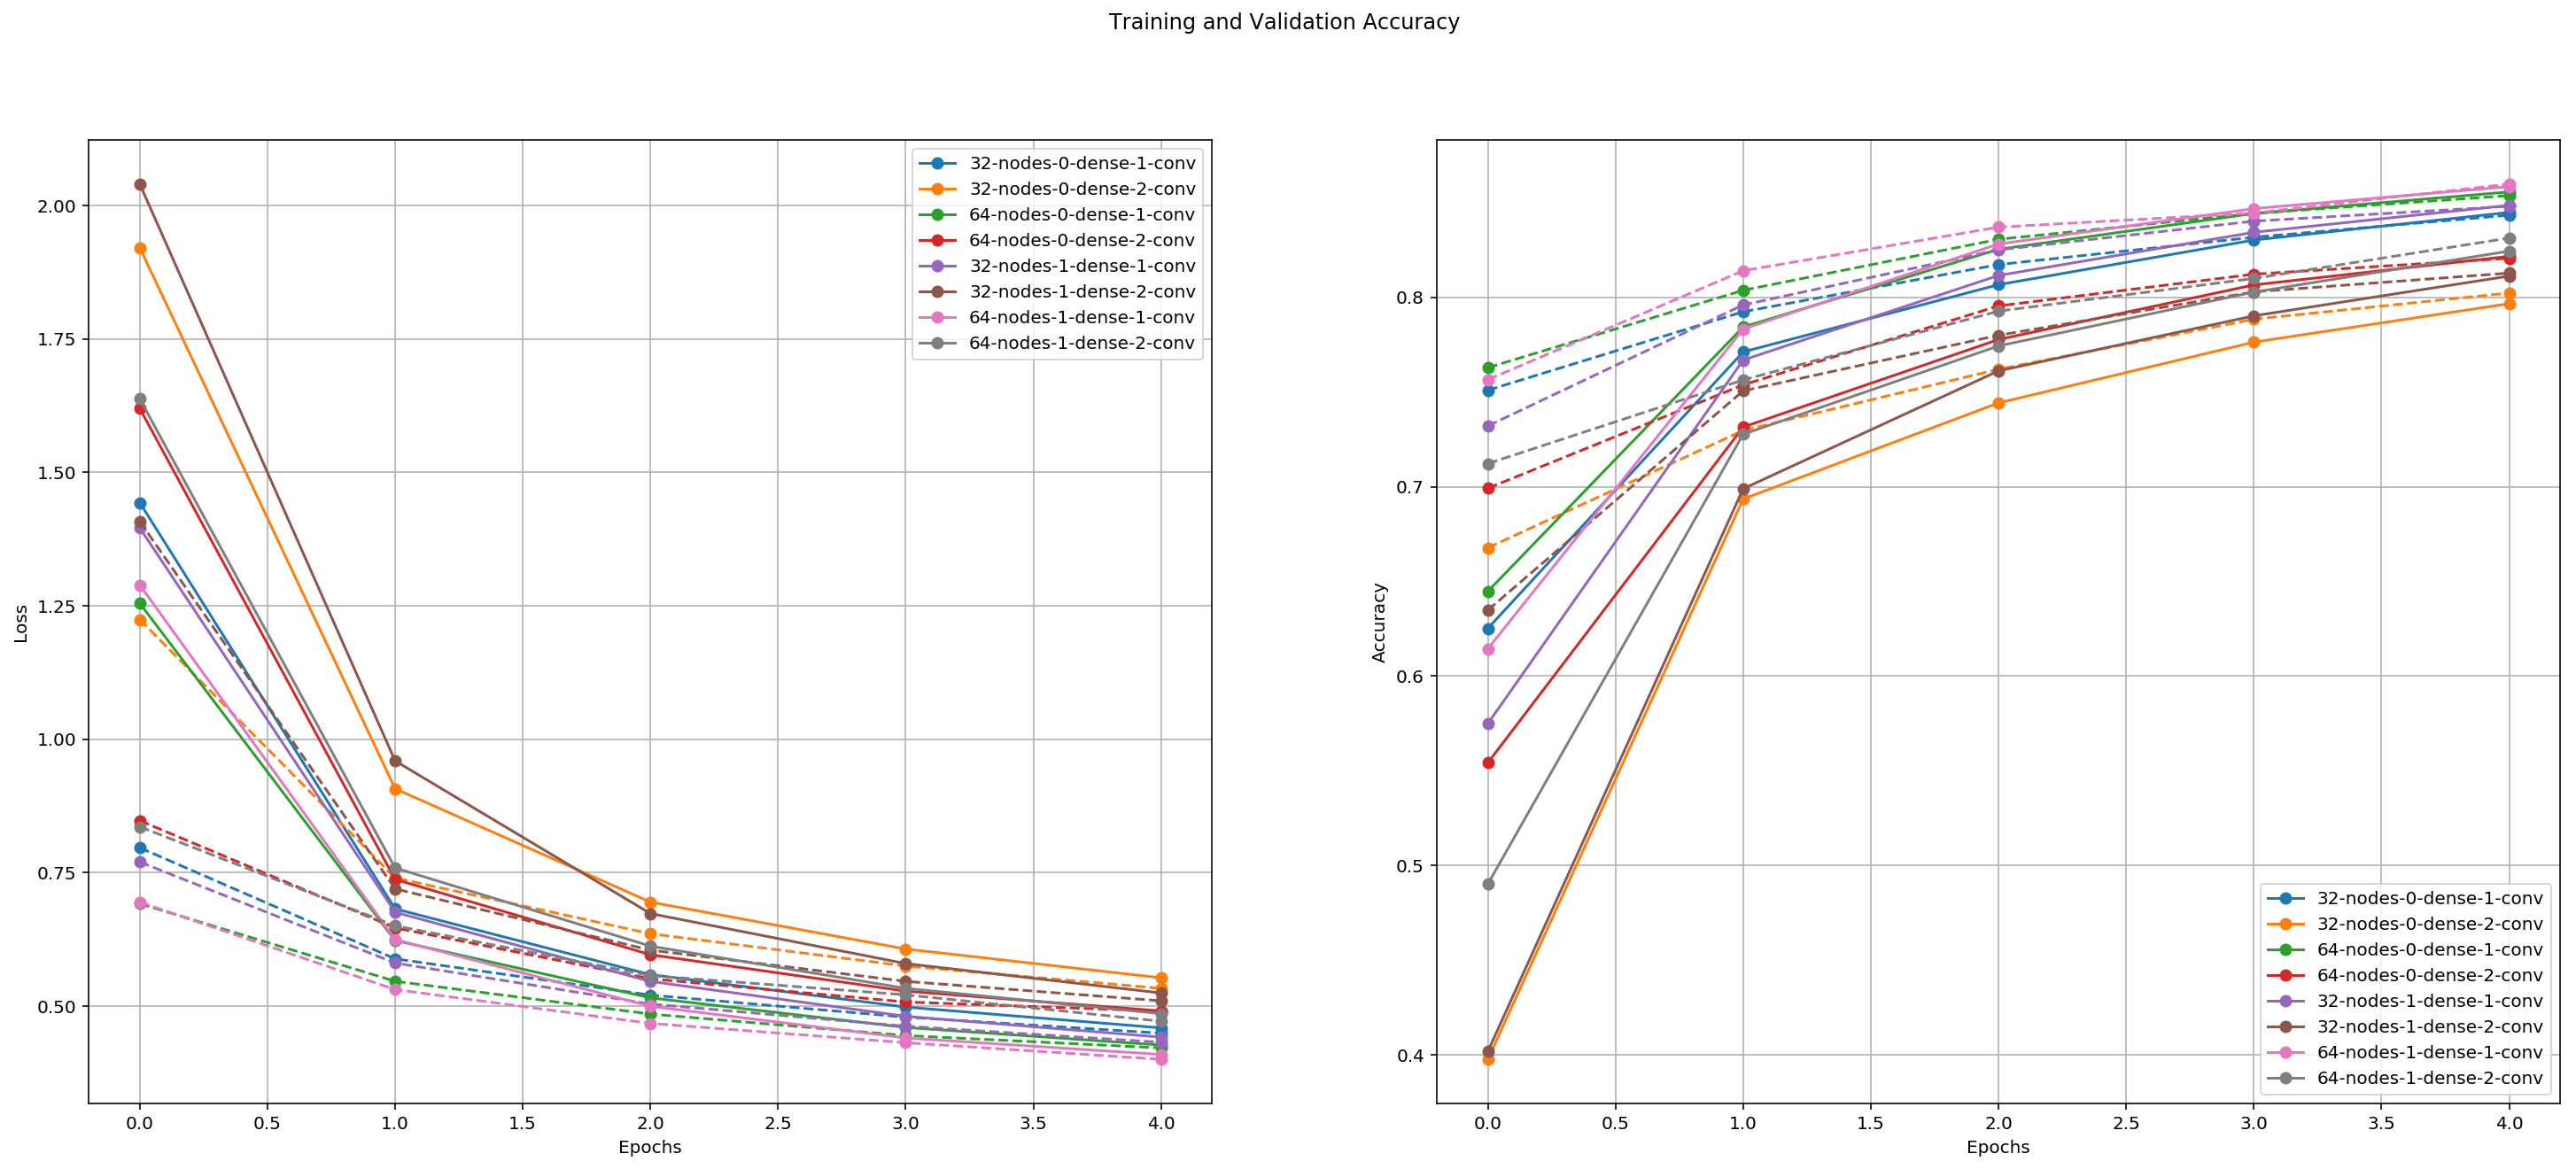

In [11]:
key = list(histories.keys())
plt.figure(figsize=(25,10))
for i in key:
    plot_histories(histories[i],i)

In [0]:
max_val_accuracy = 0
model_name = None
for i in key:
    if histories[i].history["val_acc"][-1] > max_val_accuracy:
        max_val_acc = histories[i].history["val_acc"][-1]
        model_name = i

In [14]:
print(f"The best model hyperparameters is {model_name}") 

The best model hyperparameters is 64-nodes-1-dense-2-conv


In [0]:
model.load("Conv.model")

In [0]:
model.load_weights(f"{model_name}.h5")

In [0]:
loss, accuracy = conv.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 301us/sample - loss: 0.5277 - acc: 0.8062


In [0]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0, batch_size=1024)

In [17]:
for name, value in zip(model.metrics_names, (loss, accuracy)):
    print(name, ":", value)

loss : 0.48648670711517333
acc : 0.8216


In [0]:
pred = model.predict(x_test)

In [0]:
predictions = np.argmax(pred, axis=1)

In [20]:
print(f"The accuracy of the model is: {accuracy_score(predictions, y_test)*100}%")

The accuracy of the model is: 82.16%


In [21]:
print(classification_report(y_test, predictions, labels=np.arange(0,10)))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79      1000
           1       0.98      0.95      0.97      1000
           2       0.72      0.66      0.69      1000
           3       0.83      0.87      0.85      1000
           4       0.67      0.74      0.70      1000
           5       0.93      0.94      0.94      1000
           6       0.54      0.41      0.46      1000
           7       0.93      0.88      0.90      1000
           8       0.94      0.95      0.94      1000
           9       0.92      0.95      0.93      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



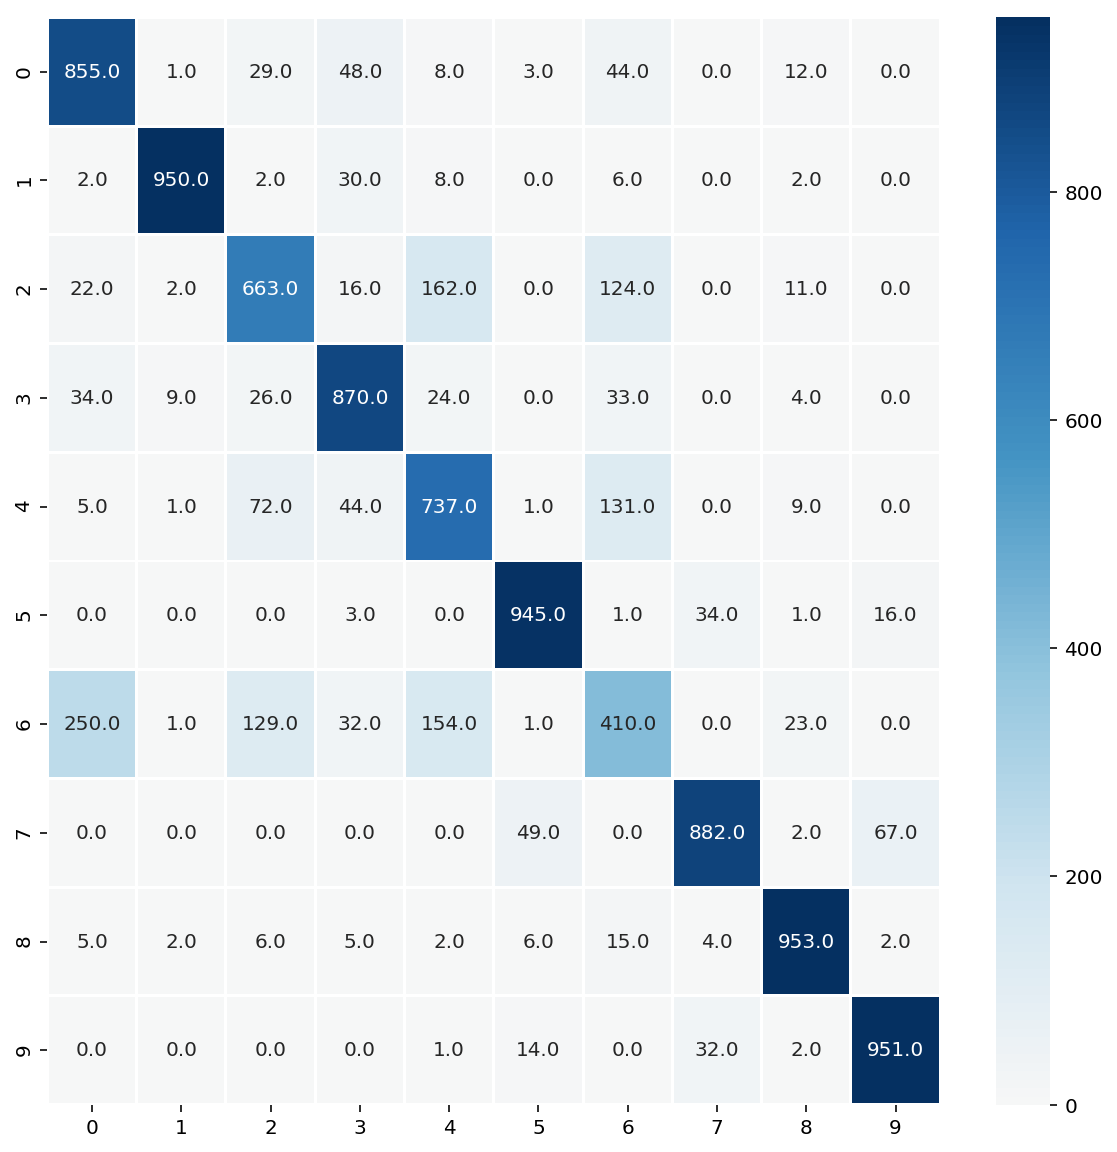

In [22]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, center=0, linewidth=1, fmt=".1f", annot=True,cmap="RdBu")

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(labels[predicted_label],
                                100*np.max(predictions_array),
                                labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [0]:
labels = [ "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",	"Shirt", "Sneaker", "Bag", "Ankle boot"]

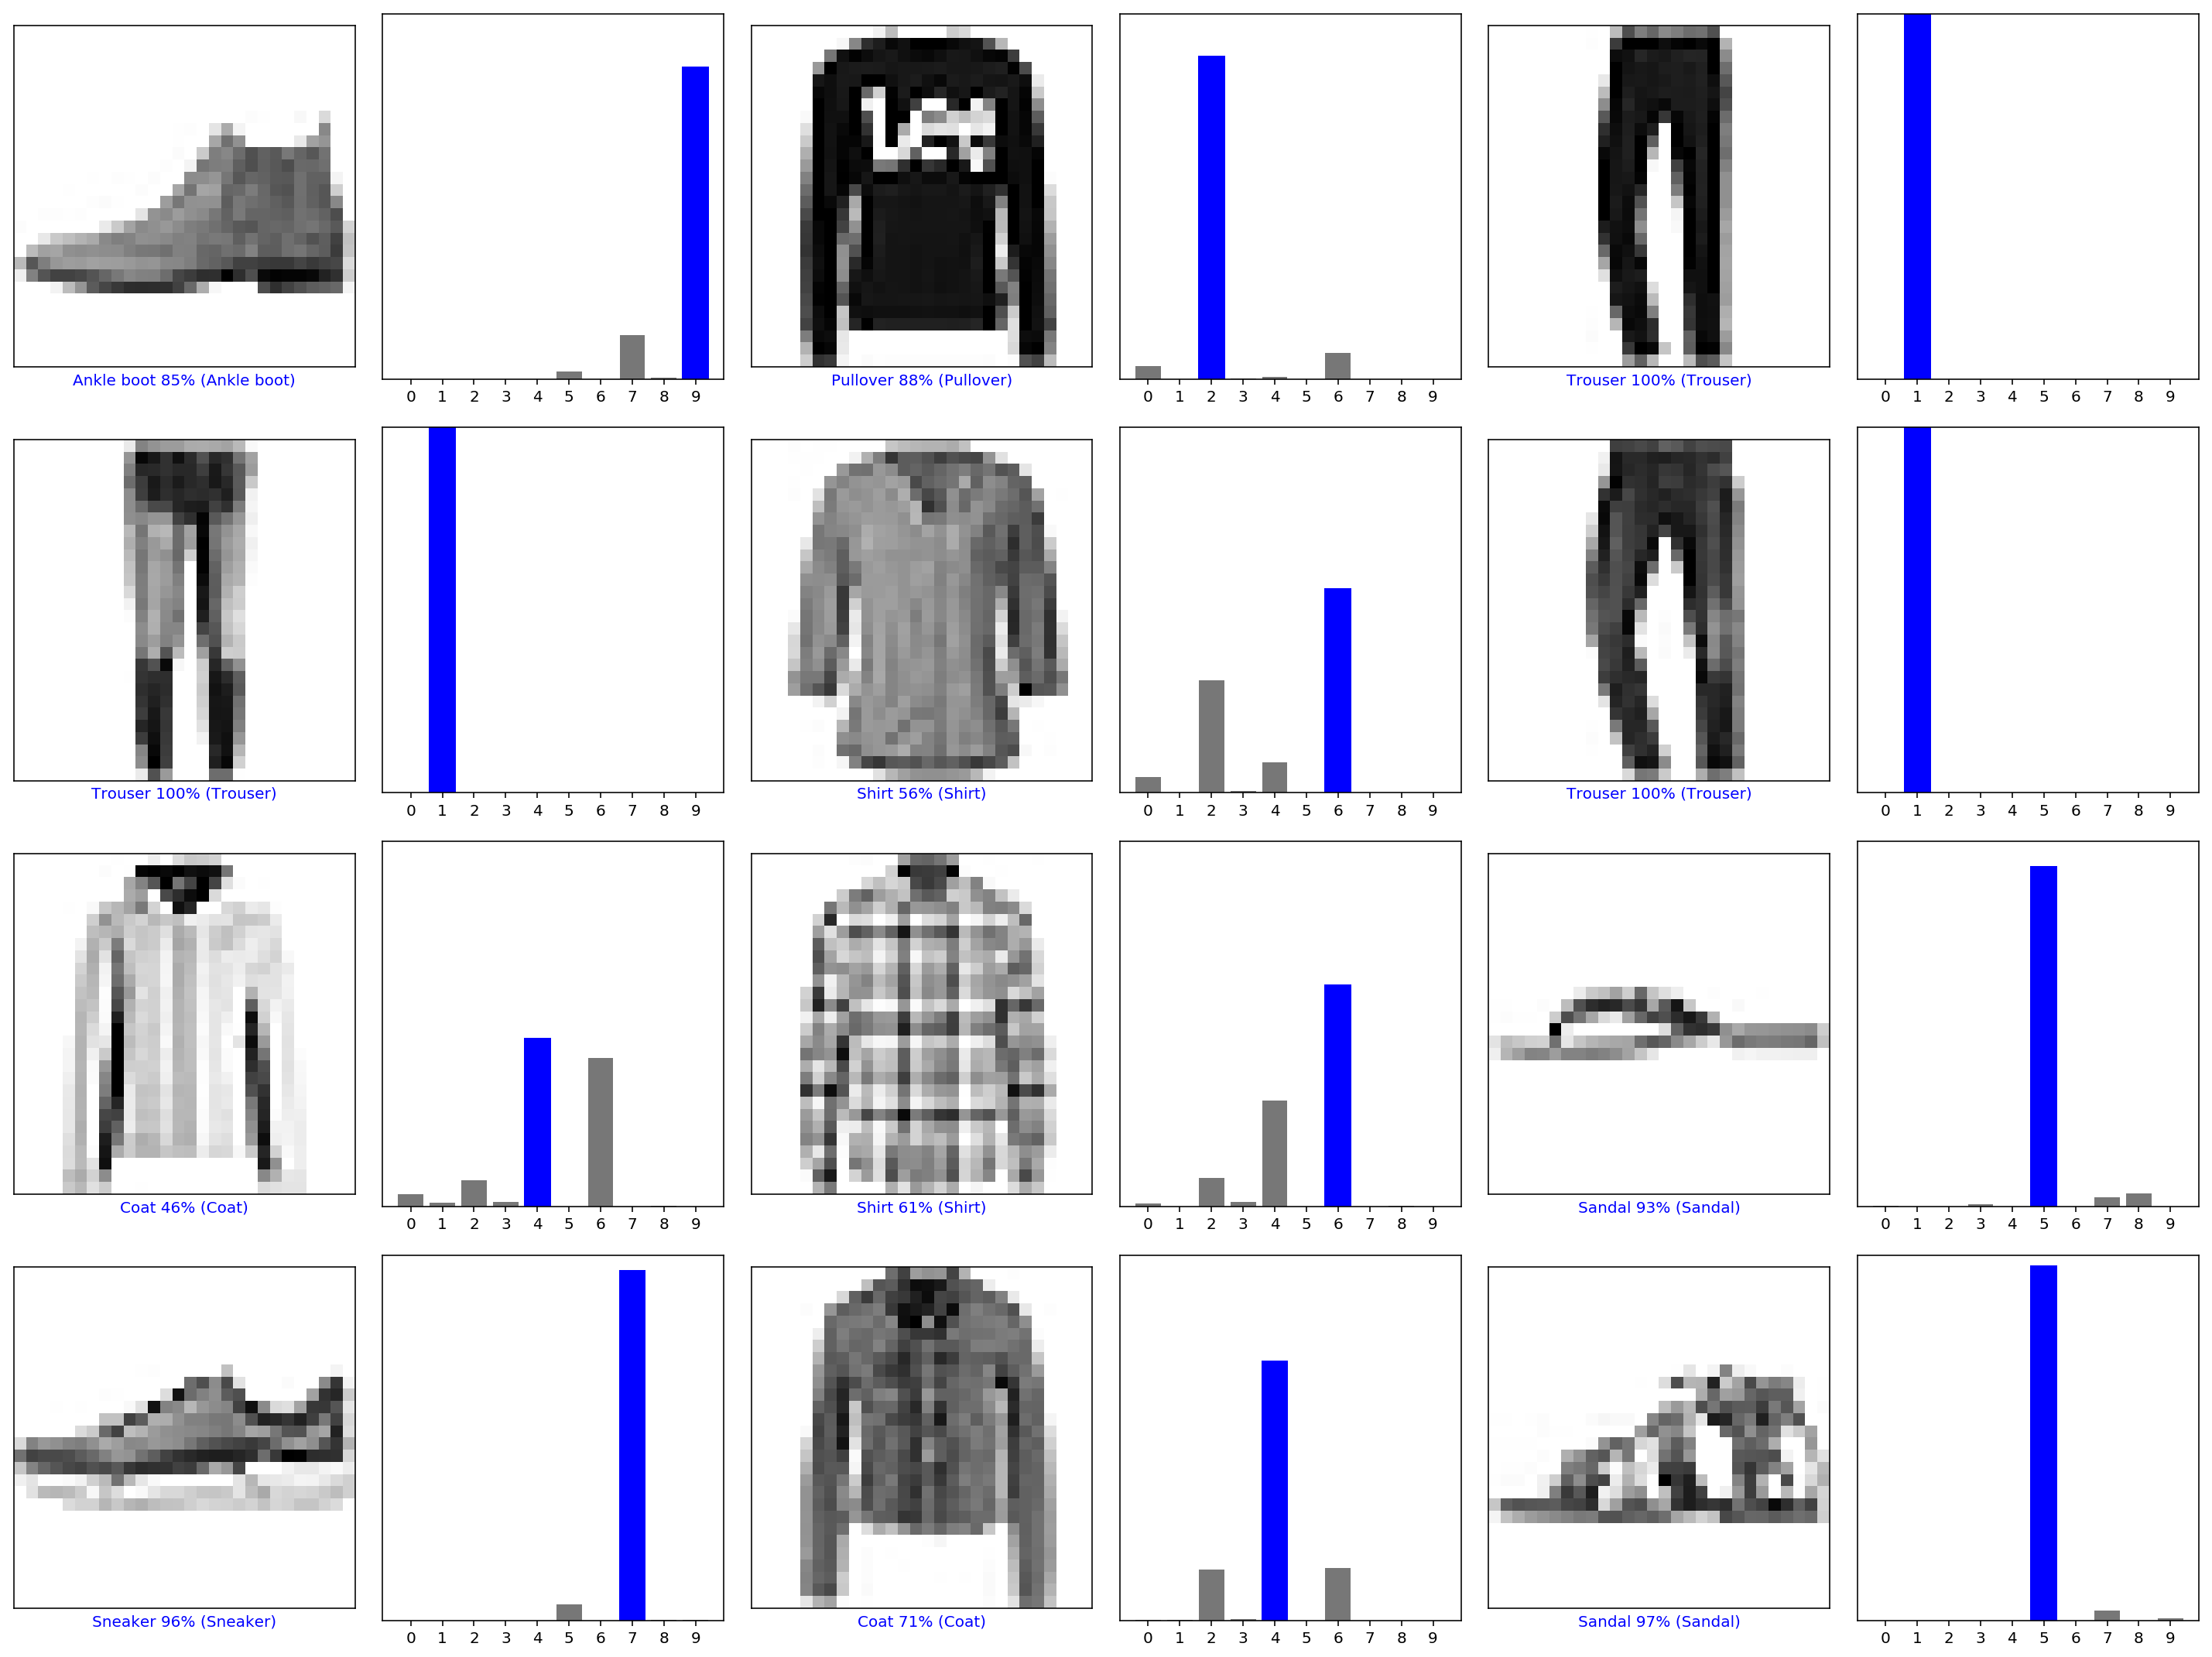

In [25]:
num_rows = 4
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(20, 15))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred[i], y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred[i], y_test)
plt.tight_layout()
plt.show()